In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import tensorflow as tf

import models

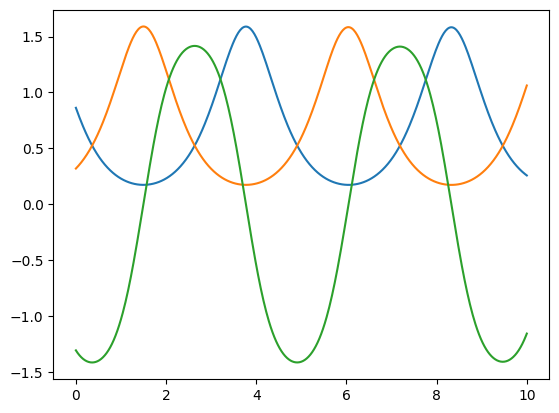

In [2]:
data = sio.loadmat("./data/ko_data_1.mat")
t_test = data["t"]
u_test = data["y"]

plt.plot(t_test, u_test[:, 0:1])
plt.plot(t_test, u_test[:, 1:2])
plt.plot(t_test, u_test[:, 2:3])
plt.show()

t_train = t_test[::20]
u_train = u_test[::20]
f_train = np.zeros_like(u_train)

In [4]:
u_test.shape

(501, 3)

In [3]:
model = models.PINN()

In [4]:
loss = model.train(t_train, f_train, t_train, u_train, niter=100000)

0 1.4644098
1000 0.06300077
2000 0.019024786
3000 0.009054376
4000 0.0024529328
5000 0.0010787582
6000 0.00070797285
7000 0.00056530355
8000 0.0004638517
9000 0.00039508552
10000 0.00034321062
11000 0.00028341
12000 0.00024354275
13000 0.00039275963
14000 0.00019065208
15000 0.0001857424
16000 0.00014747995
17000 0.00013330704
18000 0.00012059087
19000 0.00010933416
20000 0.00015744327
21000 9.159979e-05
22000 8.435869e-05
23000 0.00015932794
24000 7.286748e-05
25000 0.00013631213
26000 7.108994e-05
27000 5.7735597e-05
28000 6.40932e-05
29000 5.3923653e-05
30000 4.9785944e-05
31000 0.0005351011
32000 4.2429452e-05
33000 7.5793156e-05
34000 5.5370296e-05
35000 0.00027108713
36000 8.777607e-05
37000 4.2033374e-05
38000 0.00010671461
39000 2.834222e-05
40000 2.663077e-05
41000 3.5306453e-05
42000 2.409467e-05
43000 0.00054314313
44000 2.3857297e-05
45000 2.2908494e-05
46000 8.390238e-05
47000 2.8010549e-05
48000 1.8677558e-05
49000 1.793464e-05
50000 8.3233375e-05
51000 1.7371378e-05
5200

In [5]:
model.restore()
u_pred = model.call(tf.constant(t_test, tf.float32)).numpy()

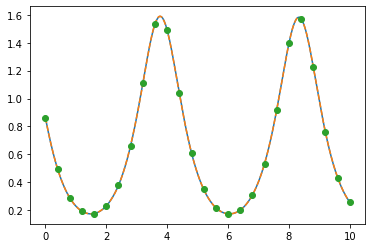

In [6]:
plt.plot(t_test, u_test[:, 0:1])
plt.plot(t_test, u_pred[:, 0:1], "--")
plt.plot(t_train, u_train[:, 0:1], "o")
plt.show()

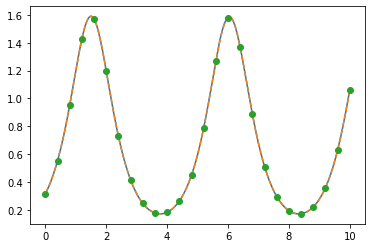

In [7]:
plt.plot(t_test, u_test[:, 1:2])
plt.plot(t_test, u_pred[:, 1:2], "--")
plt.plot(t_train, u_train[:, 1:2], "o")
plt.show()

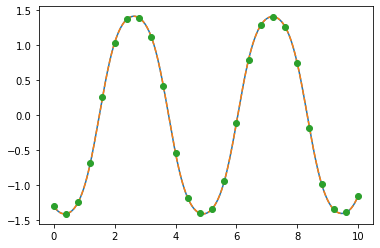

In [8]:
plt.plot(t_test, u_test[:, 2:3])
plt.plot(t_test, u_pred[:, 2:3], "--")
plt.plot(t_train, u_train[:, 2:3], "o")
plt.show()

In [9]:
print("a:", model.a.numpy())
print("b:", model.b.numpy())
print("c:", model.c.numpy())
print("d:", model.d.numpy())

a: 0.999491
b: -1.0001972
c: -0.9997188
d: 0.9982202
